# Titanic - Exploratory Data Analysis (EDA)

In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# Loading dataset
df = pd.read_csv("Titanic.csv")

In [109]:
# Showing the first 5 observations
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# Showing the number of rows and columns
df.shape

(891, 12)

In [111]:
# Exploring basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
# Showing data types and number of non-null values for each variable or column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling missing data

In [113]:
# Exploring the number of null values for each variable
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
# Replaicing null values using the median of that variable
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

In [115]:
# Dropping the variable 'Cabin' as not very relevant and most values are missing
df.drop(columns=['Cabin'], inplace=True)

In [116]:
# Dropping the rest of missing values, only 2 in 'Embarked' variable
df = df.dropna()

In [117]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [118]:
# Showing the number of rows and columns after handling missing values
df.shape

(889, 11)

## Handling duplicates

In [119]:
# Identifying duplicates
df.duplicated().sum()

0

## Formatting and Standardisation

Exploring the categories in the non-numerical variables to check for inconsistent values.

In [120]:
# Dropping the columns 'Name', 'Ticket' and 'PassengerId' as not very relevant for the analysis
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['Ticket'], inplace=True)
df.drop(columns=['PassengerId'], inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [122]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [123]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [124]:
df['Embarked'] = df['Embarked'].str.replace('S','Southampton').str.replace('C','Cherbourg').str.replace('Q','Queenstown')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


## Exploring numerical features and handling outliers

In [125]:
# Showing data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

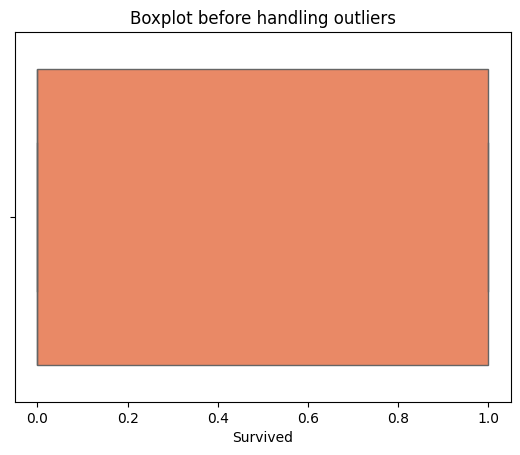

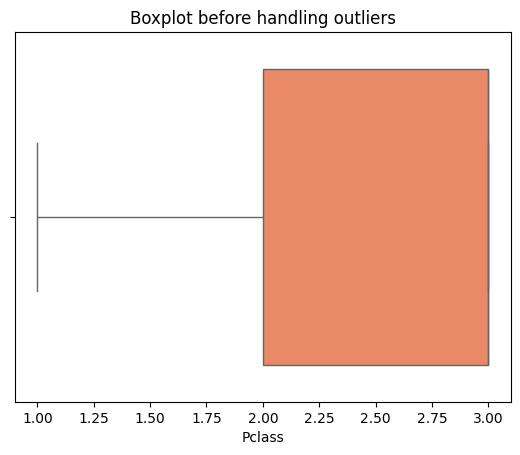

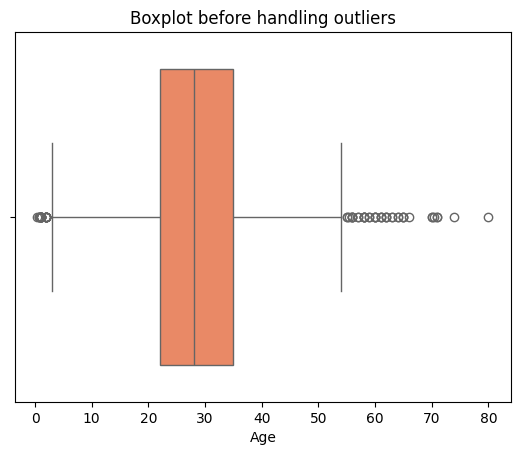

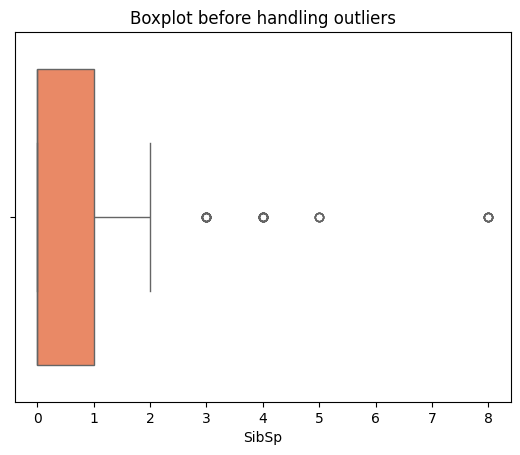

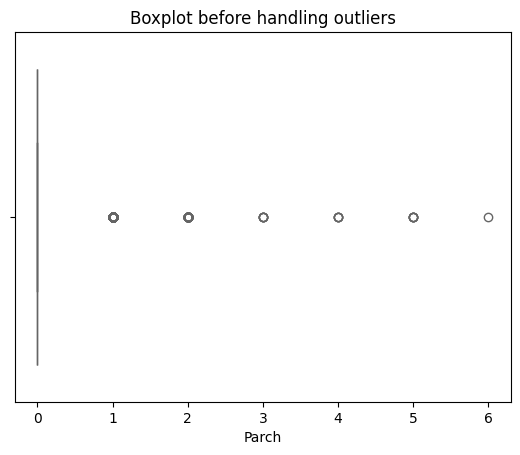

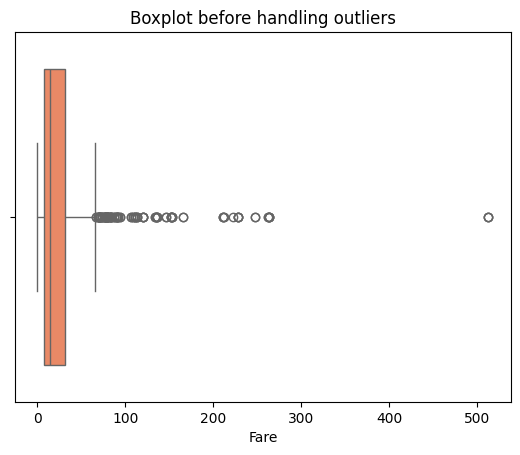

In [126]:
# Identifying outliers for each column with numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in df.columns:
    if col in numerical_features:
        sns.boxplot(x=df[col], color='coral')
        plt.title('Boxplot before handling outliers')
        plt.show()

Winsorising the features above would help with outliers handling, but we would get very different values that wouldn't match the real data. For example, the feature 'Age' changes considerably after winsorising, and so the values we get are not realiable. So, I chose not to handle the outliers of the features above as we would have the same problem.

## Exploring non-numeric features

Sex
male      577
female    312
Name: count, dtype: int64


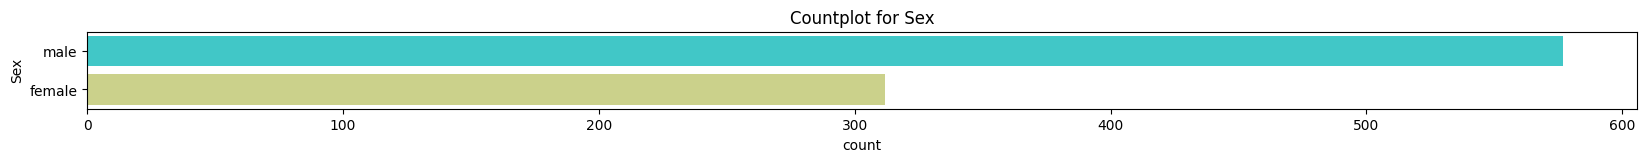

In [170]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=df, hue='Sex', palette='rainbow')
plt.title('Countplot for Sex')
print(df.Sex.value_counts())

This plot shows a significant difference between sexes, there were almost twice more males than females. One of the hypothesis that could explain this is that women didn't have the same rights as men then, and so men would have more freedom to travel both for business or leisure. 

<Axes: title={'center': 'Countplot for Port of Embarkation'}, xlabel='count', ylabel='Embarked'>

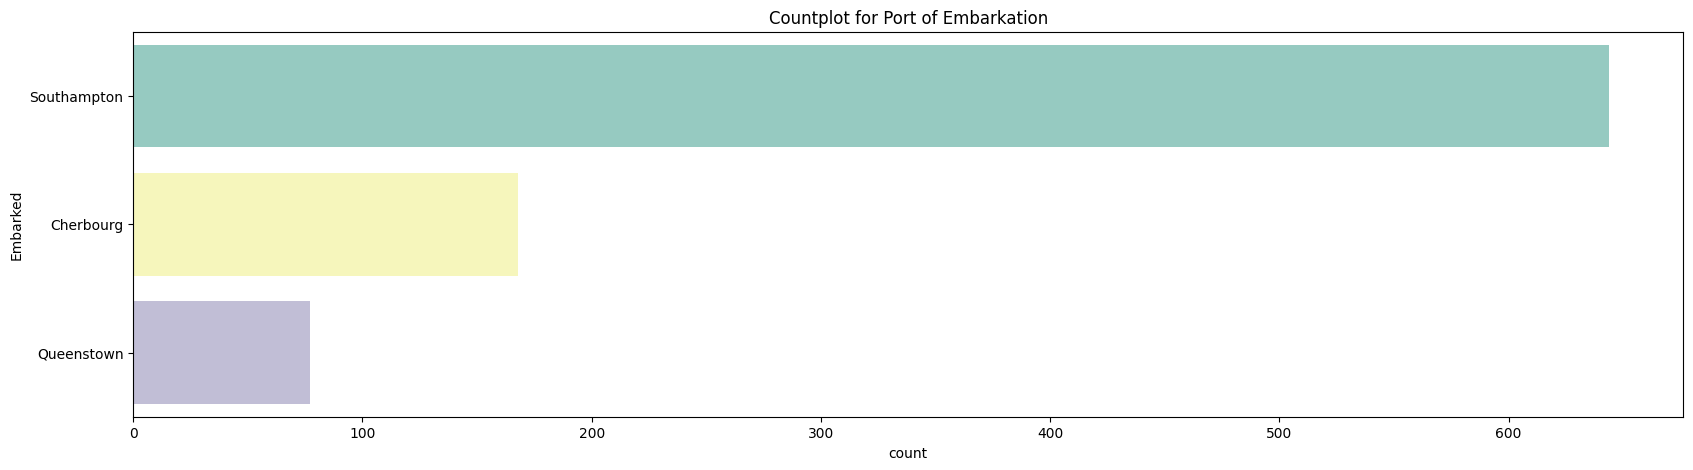

In [177]:
fig = plt.figure(figsize=(20,5))
plt.title('Countplot for Port of Embarkation')
sns.countplot(y=df['Embarked'], data=df, hue='Embarked', palette='Set3')

In this plot we can see that most of the passangers embarked from Southampton Port. Then, with less difference between them, Cherbourg Port, and finally Queenstown Port.

## Analysis

### 1. What is the most important factor in determining survival of the Titanic incident?

In [156]:
# Average survival based on sex
survival_rate_sex = df.groupby('Sex')['Survived'].mean()
survival_rate_sex


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Sex')

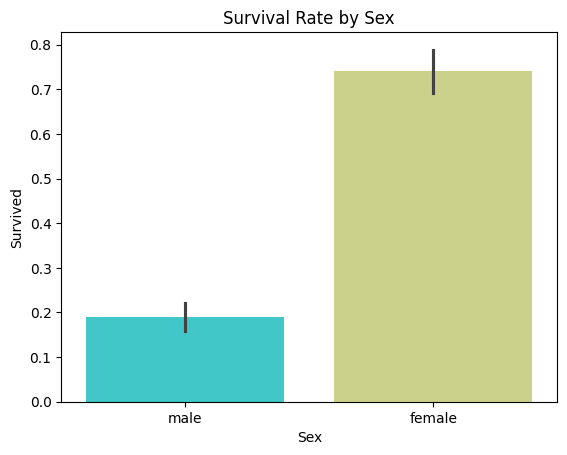

In [130]:
sns.barplot(data=df, x='Sex', y='Survived', hue='Sex', palette='rainbow')
plt.title('Survival Rate by Sex')

Based on this statictics and this barplot, we can say that women are more likely to survive on average.

Text(0.5, 1.0, 'Visualisation of Survival based on Age, Sex and Fare')

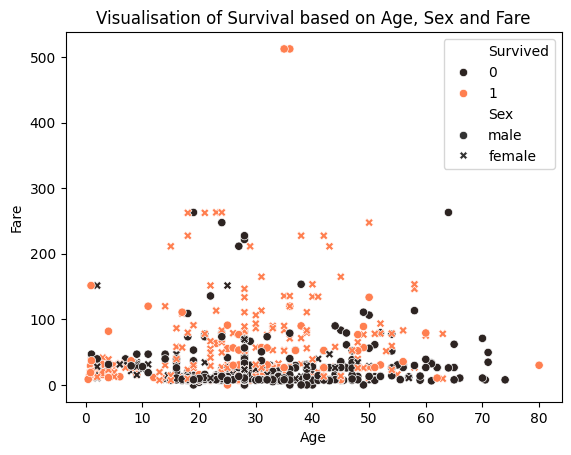

In [176]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Sex', palette='dark:coral')
plt.title('Visualisation of Survival based on Age, Sex and Fare')

This plot shows very interesting and important information about what factors could have been relevant for survival. 

- **Age**: it seems that the survival of younger people was higher, especially from 0 to 10, than older people, especially from 60 to 80. 
- **Sex**: it seems that the survival of women was higher than men, which we could better see it on the barplot for 'Survival Rate by Sex' above.
- **Fare**: it seems that the survival of people who paid higher fares is higher than the people who paid lower fares. 

In conclusion, the fare that people paid seems to be the most important factor for survival, although the age and sex are an important factor to take into account as well.

### 2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

In [132]:
df_subset = df.select_dtypes(include=[np.int64, np.float64])
df_subset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


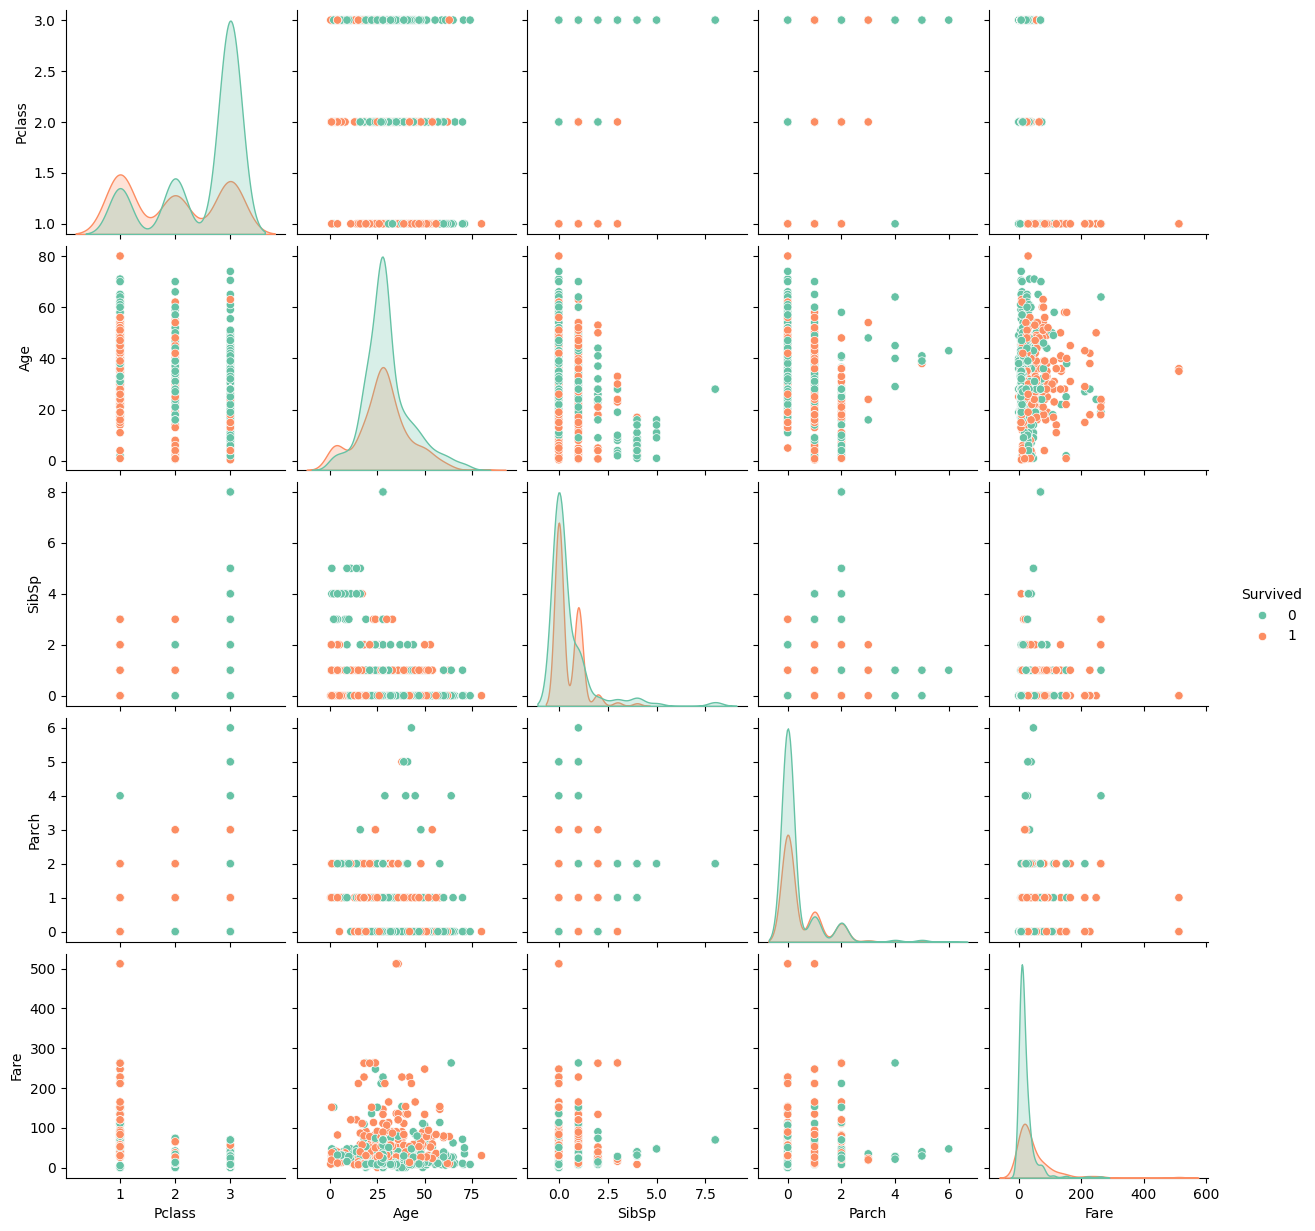

In [173]:
sns.pairplot(df_subset, hue='Survived', palette='Set2')

This pair plot allows us to have an overview of the relationship between all the numerical features. If we focus on the relationship between 'Pclass' and the rest of features, we can see that people in first class had higher survival than people in class 2 and 3, being the latter the class with lowest survival. That makes sense if we had a look at the previous plots where we could see that people paying higher fares had higher survival. 

Text(0.5, 1.0, 'Visualisation for Survival based on Fare, Class and Age')

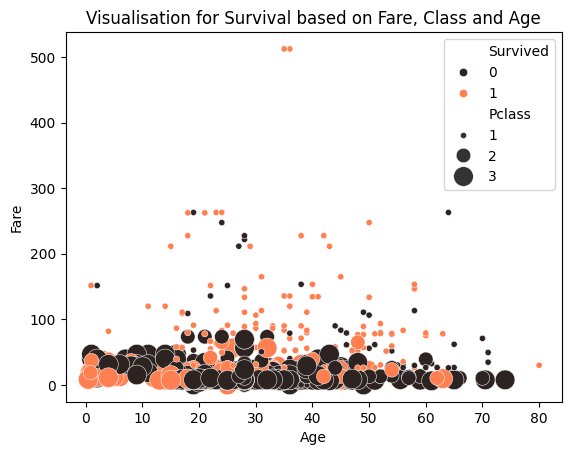

In [171]:
sns.scatterplot(data=df, x='Age', y='Fare', size='Pclass', sizes=(20,200), hue='Survived', palette='dark:coral')
plt.title('Visualisation for Survival based on Fare, Class and Age')

In this scatter plot, we can also see that people in classes 2 and 3 had lower survival than people in class 1, as well as the confirmation that people paying lower fares in general were people in lower classes. 

In conclusion, it seems that the upper-class passengers were given preference on lifeboats.

### 3. “Women and children first”. Was this the case?

<Axes: xlabel='Age', ylabel='Sex'>

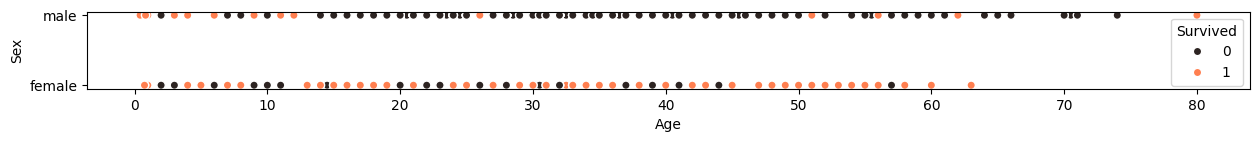

In [135]:
fig = plt.figure(figsize=(15,1))
sns.scatterplot(data=df, y='Sex', x='Age', hue='Survived', palette='dark:coral', linewidth=1)

This scatterplot shows survival based on sex and age. We can see than women had higher survival than men, as we saw earlier, and that most of males that survived were young. We have some exceptions such as a 80-year old man that survived. However, in general, we can see that women and children had higher survival than adult men. 

In conclusion, it seems that they tried to save the women and children first, but there were some exceptions such as adult men that survived and women and children that didn't survive. 

### 4. Did the location of embarkation had any relationship with survival?

In [167]:
df.groupby('Embarked')['Survived'].count()

Embarked
Cherbourg      168
Queenstown      77
Southampton    644
Name: Survived, dtype: int64

In [155]:
survival_rate_embarked = df.groupby('Embarked')['Survived'].mean()
survival_rate_embarked

Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

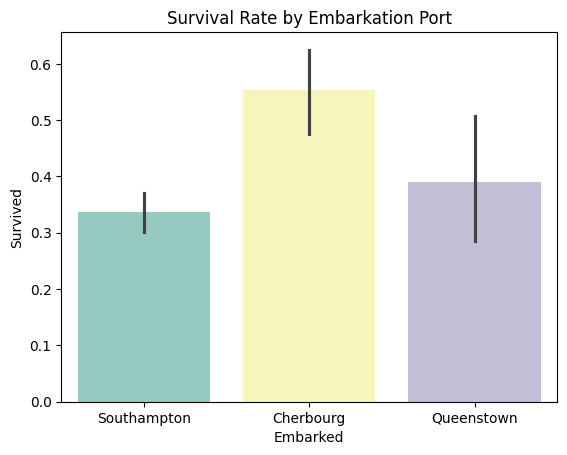

In [174]:
sns.barplot(data=df, x='Embarked', y='Survived', hue='Embarked', palette='Set3')
plt.title('Survival Rate by Embarkation Port')

This statistics and barplot shows that the survival rate was higher for the people who embarked from Cherbourg. However, I think it is important to bear in mind that Southampton was the location where most people embarked from, almost half of the people. 

In [161]:
mean_fare_embarked = df.groupby('Embarked')['Fare'].mean()
mean_fare_embarked

Embarked
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Visualisation of survival based on fare grouped by embarkation')

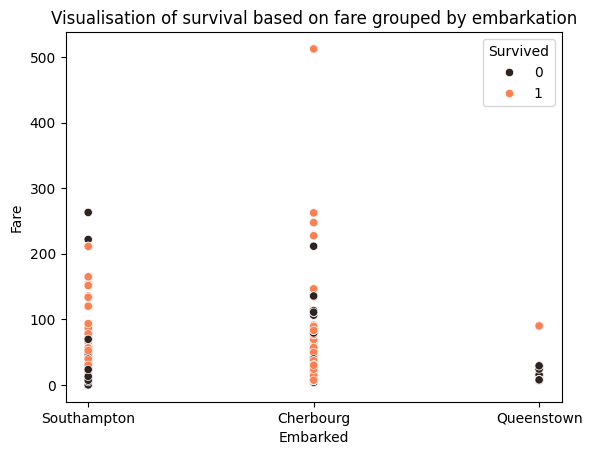

In [178]:
sns.scatterplot(data=df, x='Embarked', y='Fare', hue='Survived', palette='dark:coral')
plt.title('Visualisation of survival based on fare grouped by embarkation')

This statistics and scatterplot shows that people who embarked from Cherbourg had paid a higher fare on avarage than people emabrking from Queenstown and Southampton. Therefore, it is very likely that there was a higher survival rate of people who embarked from Cherbourg because there was more people paying higher fares embarking from that location. 